#Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen desde archivo y convierte a RGB

In [2]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 
#Muestra dimensiones
print(img.shape)
#Mostramos la original
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(img) 
plt.show()

#OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Muestra la imagen tras convertir a RGB
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

Convierte a grises para procesar

(512, 512)


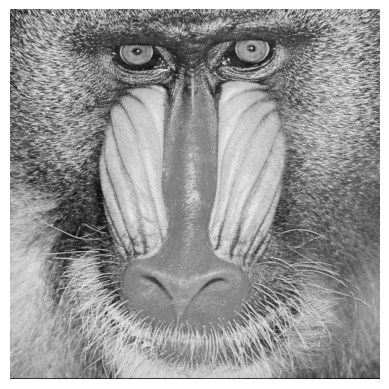

In [ ]:
#Conversión a grises de la original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()


Canny, detector de bordes multietapa. Tratado en el tema 4

[[  0 255   0 ...   0 255   0]
 [255 255   0 ...   0   0 255]
 [  0   0 255 ... 255 255   0]
 ...
 [  0   0   0 ...   0   0 255]
 [  0 255 255 ... 255 255 255]
 [255   0   0 ...   0   0   0]]


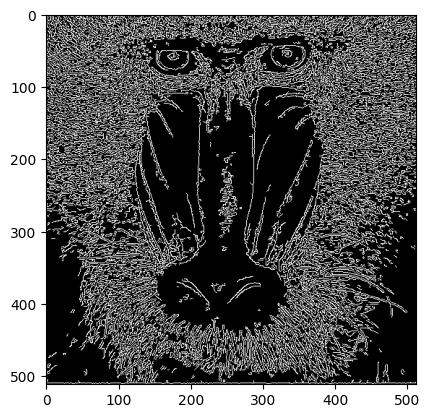

In [ ]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
print(canny)
#Muestra resultado
plt.imshow(canny, cmap='gray') 
plt.show()


Definida la imagen de salida de Canny, salida 0 o 255, obtiene el número de píxeles no nulos por columna y visualiza

(0.0, 512.0)

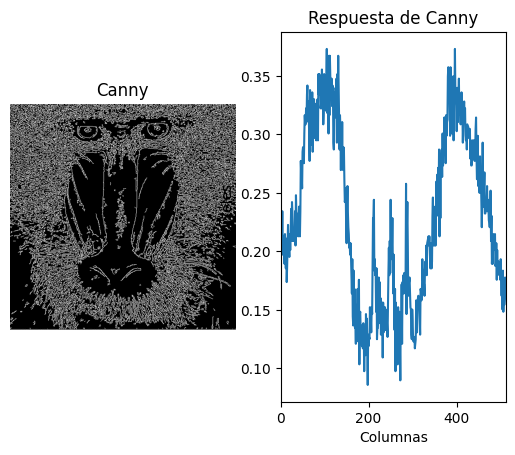

In [ ]:
#Si muestras el contenido de la imagen resultado, son valores 0 o 255
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])

rows = row_counts[0] / (255 * canny.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])



TAREA: Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo.

Sobel. Cuando hay un borde, el valor de intensidad de los píxeles cercanos cambia de forma notable, calcular las derivadas proporciona una evidencia de dicho cambio. El operador de Sobel aproximar el cálculo de la derivada aplicando un kernel de tamaño impar basado en el patrón [1 2 1]

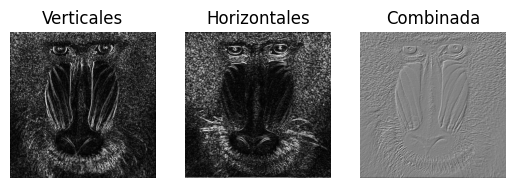

In [ ]:
# Gaussiana para suavizar la imagen original
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Combinada')
#Para visualizar convierte a escala manejable en una imagen de grises
#plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
plt.imshow(sobel, cmap='gray') #Sin convertir escala
plt.show()

TAREA: Elige otra imagen, muestra el contenido de alguna de las imágenes resultado de Sobel antes y después de ajustar la escala

Umbralizado de una imagen

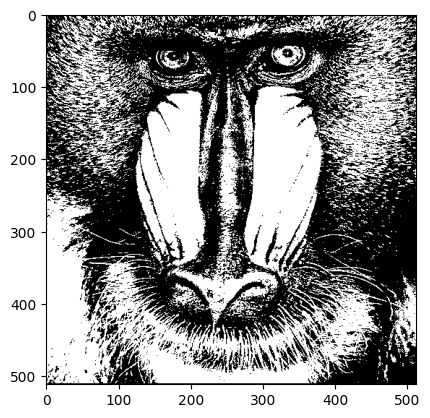

In [ ]:
#Define valor umbral
valorUmbral = 130 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(gris, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()

El histograma de una imagen aporta información sobre el valor de umbral a elegir para ciertas situaciones

(0.0, 256.0)

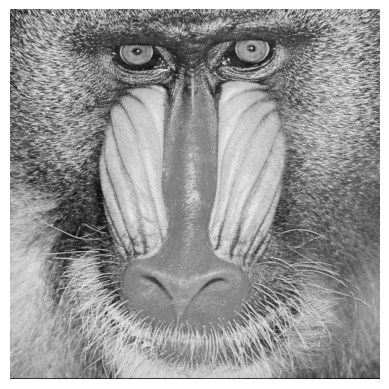

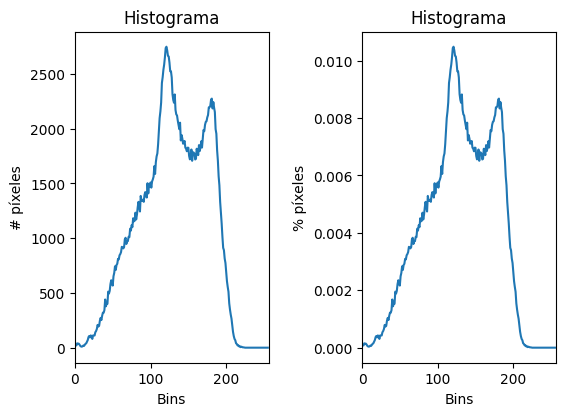

In [ ]:
#Cálculo del histograma de una imagen en escala de grises
hist = cv2.calcHist([gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

#Normaliza el histograma en base al número de píxeles y lo muestra
hist /= hist.sum()

plt.subplot(1, 2, 2)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("% píxeles")
plt.tight_layout(pad=3.0) #separación entre plots
plt.plot(hist)
plt.xlim([0, 256])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Diferencia de imágenes

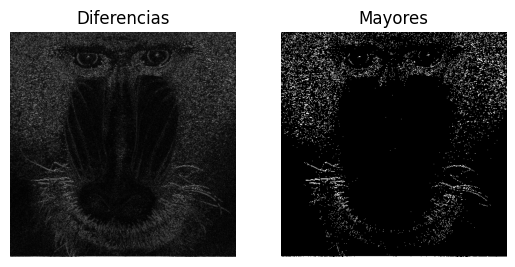

In [ ]:
#Calcula la diferencia entre dos imágenes
#Utiliza la imagen original y la obtenida tras aplicar la gaussiana
dif = cv2.absdiff(gris, ggris)

#Visualiza
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Diferencias")
plt.axis("off")
plt.imshow(dif, cmap='gray') 

#Zonas de mayor diferencia tras aplicar umbral
res, imgdif = cv2.threshold(dif, 30, 255, cv2.THRESH_BINARY)
#Visualiza
plt.subplot(1, 2, 2)
plt.title("Mayores")
plt.axis("off")
plt.imshow(imgdif, cmap='gray') 
plt.show()


Webcam y sustracción de fotogramas

In [ ]:
vid = cv2.VideoCapture(0)

#Marca de inicio
disponible = 0 
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        if disponible > 0:
            dif = cv2.absdiff(frame, pframe)        
            # Muestra resultado
            cv2.imshow('Diferencia', dif)        

        else:
            disponible = 1

        #Copia fotograma actual para la diferencia en el siguiente forograma
        pframe = frame.copy()
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Webcam y sustracción de modelo del fondo

In [ ]:
vid = cv2.VideoCapture(0)


# Fondo
# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)
  


while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem=cv2.flip(frame, 1)

        
        #Con un segundo parámerto se puede definir máscara con zonas a actualizar
        objetos = eliminadorFondo.apply(framem)
        #objetos = eliminadorFondo.apply(framem, objetos, 0)  #No actualiza el fondo
        # Obtiene fondo
        background = eliminadorFondo.getBackgroundImage()

        # Muestra resultado
        cv2.imshow('Fotograma', objetos)
        # Muestra fondo
        cv2.imshow('Fondo', background)
  
   
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


TAREA: Asumiendo que quieren mostrar a personas que no forman parte del curso de VC el comportamiento de una o varias funcioens de las vistas hasta este momento aplicadas sobre la entrada de la webcam. ¿Cuál(es) escogerían?

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) propongan (los componentes de cada grupo) una reinterpretación del procesamiento de imágenes con las técnicas vistas o que conozcan.